# Task 1: Data Cleaning and Preprocessing — Netflix Dataset

## Objective
Clean and prepare a raw dataset using Python (Pandas), addressing:
- Missing values
- Duplicates
- Inconsistent formats (e.g., column names, dates)
- Data type issues

## Dataset: Netflix Movies and TV Shows
Source: Kaggle  
Filename: `netflix_titles.csv`

## 📊 Summary of Cleaning & Preprocessing Steps

-  Renamed all column headers to lowercase with underscores for consistency
-  Removed duplicate records using `drop_duplicates()`
-  Handled missing values:
  - `director`, `cast`, `country`: Filled with `"Unknown"` or `"Not Available"`
  - `rating`, `duration`: Filled with most frequent (mode) value
  - `date_added`: Converted to datetime and filled missing values with mode
-  Trimmed leading/trailing whitespace from all text fields
-  Set DataFrame index to start from 1 for readability
-  Converted `date_added` to `datetime64[ns]` format
-  Cleaned dataset saved as `netflix_titles_cleaned.csv`
- **Plotted a line chart** to visualize content release trends over the years using `matplotlib`


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
df=pd.read_csv('/Users/vishnupanicker/Elevate Labs/netflix_titles.csv')

In [11]:
df.index=df.index+1
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
2,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
3,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
4,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
5,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [13]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [14]:
df.isnull().sum().sum()

np.int64(4307)

In [16]:
df_cleaned = df.copy()

In [17]:
df_cleaned.columns = df_cleaned.columns.str.strip().str.lower().str.replace(" ", "_")

In [18]:
df_cleaned.drop_duplicates(inplace=True)

In [19]:
df_cleaned['director'].fillna('Unknown', inplace=True)
df_cleaned['cast'].fillna('Not Available', inplace=True)
df_cleaned['country'].fillna('Unknown', inplace=True)

/var/folders/yq/wp_dphf9569398vr9m06jslh0000gn/T/ipykernel_51419/3296812440.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['director'].fillna('Unknown', inplace=True)
/var/folders/yq/wp_dphf9569398vr9m06jslh0000gn/T/ipykernel_51419/3296812440.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

In [20]:
df_cleaned['date_added'] = pd.to_datetime(df_cleaned['date_added'], errors='coerce')
df_cleaned['date_added'].fillna(df_cleaned['date_added'].mode()[0], inplace=True)

/var/folders/yq/wp_dphf9569398vr9m06jslh0000gn/T/ipykernel_51419/575360799.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['date_added'].fillna(df_cleaned['date_added'].mode()[0], inplace=True)


In [21]:
df_cleaned['rating'].fillna(df_cleaned['rating'].mode()[0], inplace=True)
df_cleaned['duration'].fillna(df_cleaned['duration'].mode()[0], inplace=True)

/var/folders/yq/wp_dphf9569398vr9m06jslh0000gn/T/ipykernel_51419/2290856915.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['rating'].fillna(df_cleaned['rating'].mode()[0], inplace=True)
/var/folders/yq/wp_dphf9569398vr9m06jslh0000gn/T/ipykernel_51419/2290856915.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which w

In [22]:
string_cols = df_cleaned.select_dtypes(include='object').columns
df_cleaned[string_cols] = df_cleaned[string_cols].apply(lambda x: x.str.strip())

In [23]:
df_cleaned.index = range(1, len(df_cleaned) + 1)

In [24]:
df_cleaned.to_csv("netflix_titles_cleaned.csv", index=False)

In [26]:
print("Data Cleaning Complete!\n")
print(df_cleaned.info())

Data Cleaning Complete!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 1 to 8807
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8807 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   object        
 9   duration      8807 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB
None


In [27]:
df_cleaned.isnull().sum().sum()

np.int64(0)

In [31]:
print(df_cleaned['type'].value_counts())
print(df_cleaned['country'].value_counts().head(10))

type
Movie      6131
TV Show    2676
Name: count, dtype: int64
country
United States     2818
India              972
Unknown            831
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: count, dtype: int64


In [32]:
df_cleaned.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,8807,8807,8807,8807,8807.000000,8807,8807,8807,8807
unique,8807,2,8806,4529,7693,749,NaN,NaN,17,220,514,8775
top,s1,Movie,Consequences,Unknown,Not Available,United States,NaN,NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,2,2634,825,2818,NaN,NaN,3211,1796,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-17 12:13:09.735437824,2014.180198,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-01 00:00:00,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2018-04-06 00:00:00,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-04 00:00:00,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-18 00:00:00,2019.000000,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-25 00:00:00,2021.000000,NaN,NaN,NaN,NaN


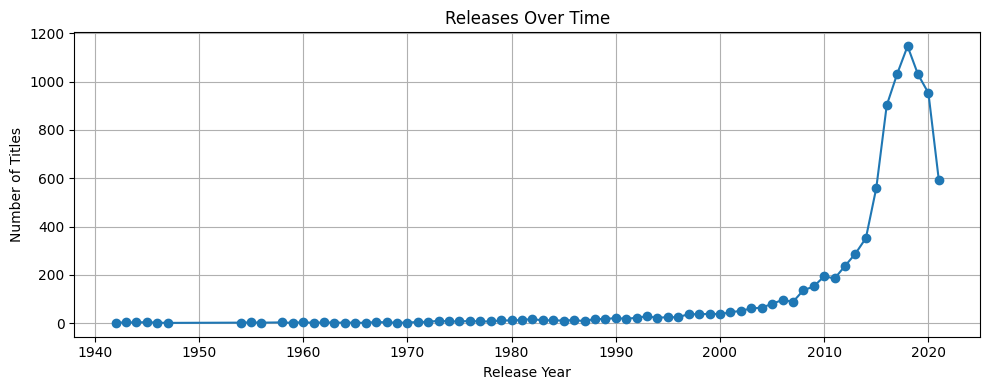

In [37]:
min_year = df_cleaned['release_year'].min()
year_counts = df_cleaned['release_year'].value_counts().sort_index()
year_counts = year_counts[year_counts.index > min_year]
plt.figure(figsize=(10, 4))
plt.plot(year_counts.index, year_counts.values, marker='o')
plt.title('Releases Over Time')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.tight_layout()
plt.show()